In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix

In [2]:
tsv_file='Restaurant_Reviews.tsv'
 
# reading given tsv file
csv_table=pd.read_table(tsv_file,sep='\t')
 
# converting tsv file into csv
csv_table.to_csv('Restaurant_Reviews.csv',index=False)
 
# output
print("Successfully made csv file")

Successfully made csv file


In [3]:
df=csv_table

In [4]:
#Pandas.crosstab():frequency distribution
pd.crosstab(index=df['Liked'],columns='count',dropna=True) #dropna is deleting null values

col_0,count
Liked,
0,500
1,500


<Axes: xlabel='Liked', ylabel='count'>

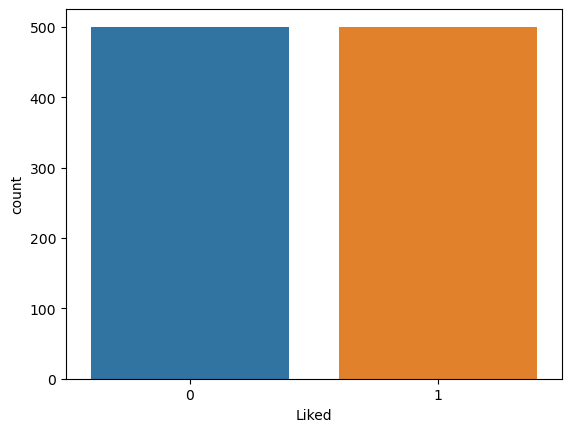

In [5]:
#sns.countplot(k.Liked)
sns.countplot(x='Liked', data=df)

In [6]:
nltk.download('stopwords')
lm = WordNetLemmatizer() #reducing words to their base or root form.
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

corpus = text_transformation(df['Review'])

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


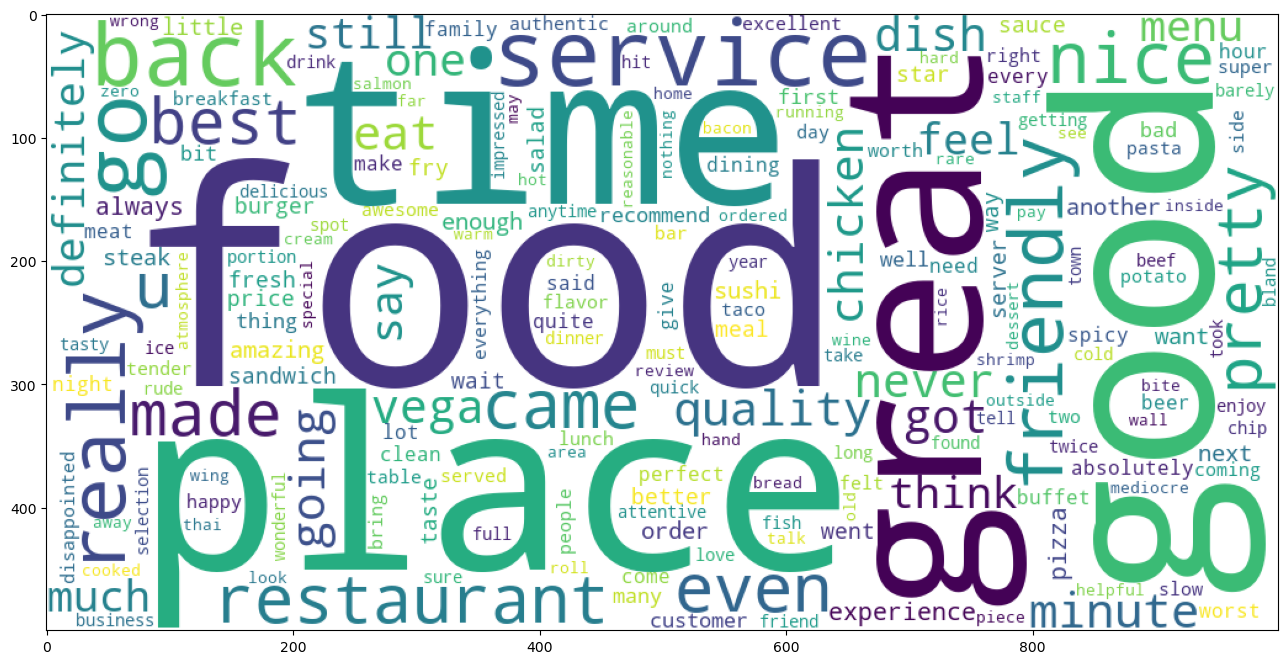

In [7]:
#Overall, these lines of code generate and display a word cloud visualization based on the input text (word_cloud). 
#The word cloud visually represents the frequency or importance of words in the input text.

plt.rcParams['figure.figsize'] = 20,8 #20,8: This sets the width to 20 inches and the height to 8 inches for figures.
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [8]:
cv = CountVectorizer(ngram_range=(1,2)) #collection of text documents to a matrix of token counts
traindata = cv.fit_transform(corpus)
X = traindata
y = df.Liked

In [9]:
parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [500, 1000,1500],
             'max_depth': [5, 10, None],
             'min_samples_split': [5, 10, 15],
             'min_samples_leaf': [1, 2, 5, 10],
             'bootstrap': [True, False]}

In [10]:
#to get the best hyperparameters found during the search.
grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
grid_search.best_params_

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
561 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\ut

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 15,
 'n_estimators': 500}

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming you have defined parameters and X, y before this

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': np.arange(10, 110, 10),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X, y)

# Print the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
185 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
94 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils

Best Parameters: {'n_estimators': 250, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 100, 'bootstrap': False}


In [12]:
for i in range(100):
    print('Parameters: ',random_search.cv_results_['params'][i])
    print('Mean Test Score: ',random_search.cv_results_['mean_test_score'][i])
    print('Rank: ',random_search.cv_results_['rank_test_score'][i])

Parameters:  {'n_estimators': 450, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 90, 'bootstrap': True}
Mean Test Score:  0.6459999999999999
Rank:  52
Parameters:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 40, 'bootstrap': False}
Mean Test Score:  0.708
Rank:  41
Parameters:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}
Mean Test Score:  0.673
Rank:  46
Parameters:  {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True}
Mean Test Score:  0.731
Rank:  34
Parameters:  {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 60, 'bootstrap': False}
Mean Test Score:  0.7540000000000001
Rank:  19
Parameters:  {'n_estimators': 450, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_fe

In [13]:
#is a method in scikit-learn that performs a randomized search over a specified hyperparameter distribution
rfc = RandomForestClassifier(max_features=random_search.best_params_['max_features'],
                                      max_depth=random_search.best_params_['max_depth'],
                                      n_estimators=random_search.best_params_['n_estimators'],
                                      min_samples_split=random_search.best_params_['min_samples_split'],
                                      min_samples_leaf=random_search.best_params_['min_samples_leaf'],
                                      bootstrap=random_search.best_params_['bootstrap'])
rfc.fit(X,y)

RandomForestClassifier(bootstrap=False, max_depth=100, max_features='log2',
                       min_samples_split=10, n_estimators=250)

In [14]:
test_df = pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t',names=['Review','Liked'])
X_test,y_test = test_df.Review,test_df.Liked
#encode the labels into two classes , 0 and 1
#test_df = custom_encoder(y_test)
test_df = df['Liked']
#pre-processing of text
test_corpus = text_transformation(X_test)
#convert text data into vectors
testdata = cv.transform(test_corpus)
#predict the target
predictions = rfc.predict(testdata)

In [15]:
y_test

0       Liked
1           1
2           0
3           0
4           1
        ...  
996         0
997         0
998         0
999         0
1000        0
Name: Liked, Length: 1001, dtype: object

In [16]:
'''import numpy as np
import pandas as pd  # Import pandas if not already imported
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

# Assuming y_pred and y_test are NumPy arrays or lists
# If y_test is a Pandas Series, convert it to a NumPy array
y_test = y_test.values if isinstance(y_test, pd.Series) else y_test

# Handle NaN values in y_test
nan_indices = np.isnan(y_test) | ~np.isfinite(y_test)
y_test = y_test[~nan_indices]
y_pred = y_pred[~nan_indices]

# Check if there are any unique values in y_test
unique_values = np.unique(y_test)
if len(unique_values) == 0 or (len(unique_values) == 1 and np.isnan(unique_values[0])):
    print("No valid unique values in y_test. Unable to compute classification report.")
else:
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate other metrics
    acc_score = accuracy_score(y_test, y_pred)
    pre_score = precision_score(y_test, y_pred)
    rec_score = recall_score(y_test, y_pred)

    print('Accuracy_score:', acc_score)
    print('Precision_score:', pre_score)
    print('Recall_score:', rec_score)
    print("-" * 50)

    # Classification Report
    cr = classification_report(y_test, y_pred)
    print(cr)'''


'import numpy as np\nimport pandas as pd  # Import pandas if not already imported\nfrom sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report\n\n# Assuming y_pred and y_test are NumPy arrays or lists\n# If y_test is a Pandas Series, convert it to a NumPy array\ny_test = y_test.values if isinstance(y_test, pd.Series) else y_test\n\n# Handle NaN values in y_test\nnan_indices = np.isnan(y_test) | ~np.isfinite(y_test)\ny_test = y_test[~nan_indices]\ny_pred = y_pred[~nan_indices]\n\n# Check if there are any unique values in y_test\nunique_values = np.unique(y_test)\nif len(unique_values) == 0 or (len(unique_values) == 1 and np.isnan(unique_values[0])):\n    print("No valid unique values in y_test. Unable to compute classification report.")\nelse:\n    # Compute confusion matrix\n    cm = confusion_matrix(y_test, y_pred)\n\n    # Calculate other metrics\n    acc_score = accuracy_score(y_test, y_pred)\n    pre_score = precision_score(y_t

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

# Print unique values to identify the issue
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in predictions:", np.unique(predictions))

# Map string labels to numeric values
label_mapping = {'Liked': 1, '0': 0, '1': 1}  # Update this mapping based on your actual labels
y_test_numeric = np.array([label_mapping[label] for label in y_test])
predictions_numeric = predictions.astype(float)

# Handle NaN values in y_test
nan_indices = np.isnan(predictions_numeric) | ~np.isfinite(predictions_numeric)
y_test_numeric = y_test_numeric[~nan_indices]
predictions_numeric = predictions_numeric[~nan_indices]








#........................
# Compute confusion matrix
cm = confusion_matrix(y_test_numeric, predictions_numeric)

# Calculate other metrics
acc_score = accuracy_score(y_test_numeric, predictions_numeric)
pre_score = precision_score(y_test_numeric, predictions_numeric)
rec_score = recall_score(y_test_numeric, predictions_numeric)

print('Accuracy_score:', acc_score)
print('Precision_score:', pre_score)
print('Recall_score:', rec_score)
print("-" * 50)

# Classification Report
cr = classification_report(y_test_numeric, predictions_numeric)
print(cr)


Unique values in y_test: ['0' '1' 'Liked']
Unique values in predictions: [0 1]
Accuracy_score: 0.9790209790209791
Precision_score: 0.9878048780487805
Recall_score: 0.9700598802395209
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       500
           1       0.99      0.97      0.98       501

    accuracy                           0.98      1001
   macro avg       0.98      0.98      0.98      1001
weighted avg       0.98      0.98      0.98      1001



In [ ]:
'''plt.rcParams['figure.figsize'] = 10,5
#plot_confusion_matrix(y_test,predictions,labels='Liked')
plot=confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions)
rec_score = recall_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(y_test,predictions)
print(cr) '''''

In [20]:
import sklearn
print(sklearn.__version__)


1.3.2


In [21]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


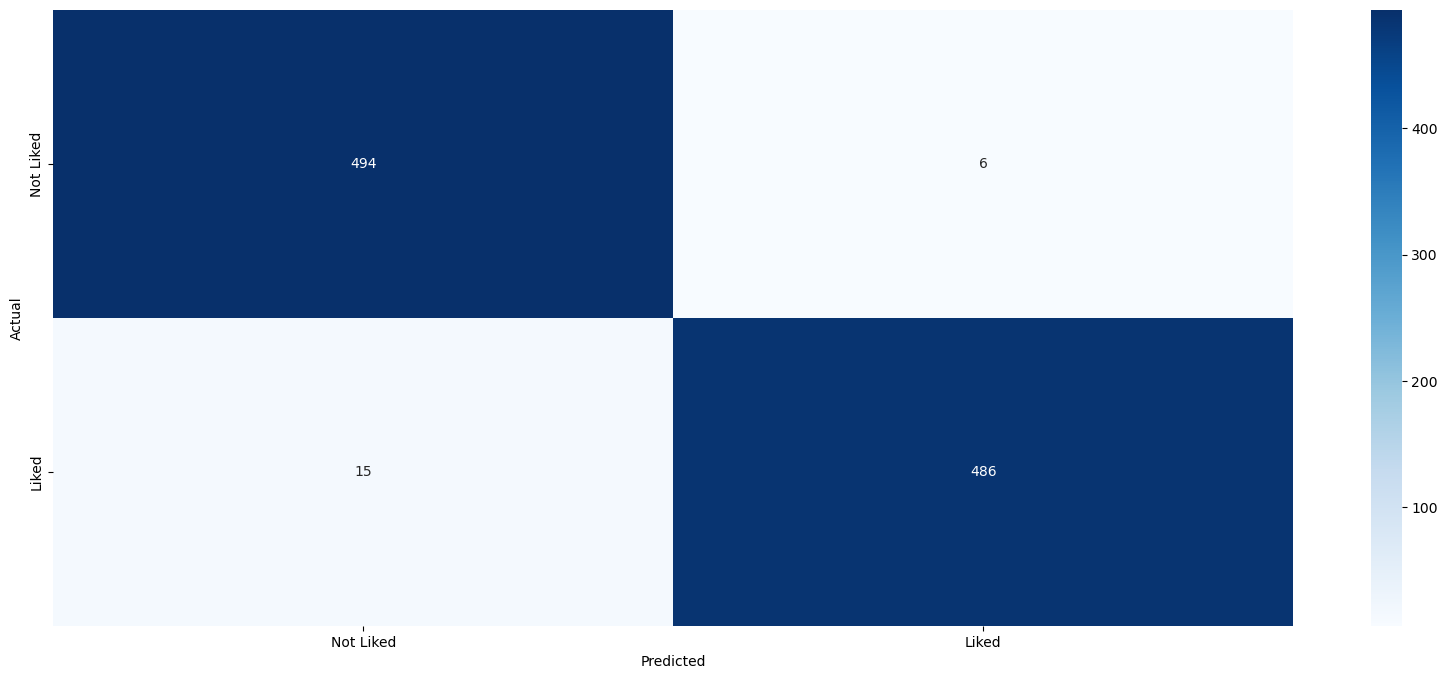

In [22]:
import seaborn as sns

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Liked', 'Liked'], yticklabels=['Not Liked', 'Liked'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have features X and labels y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

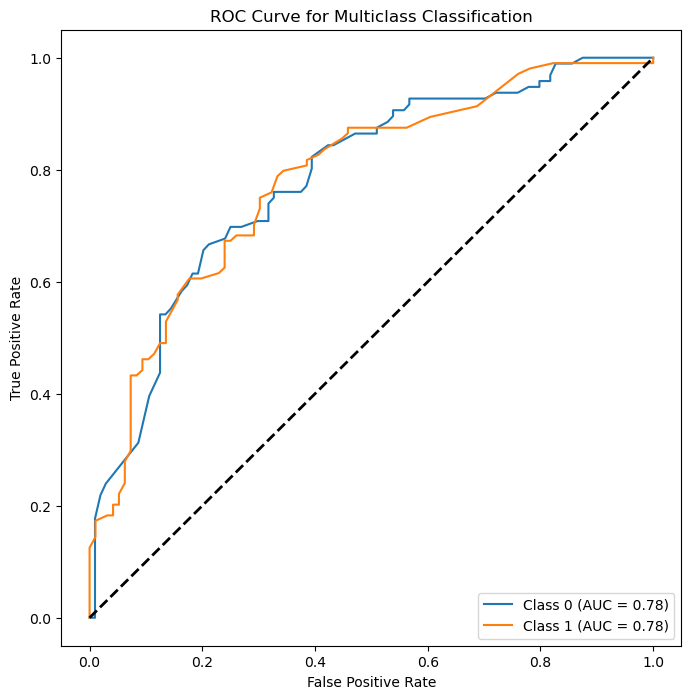

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have a trained model named 'model' and test data 'X_test'
# Use predict_proba to get class probabilities
predictions_probability = model.predict_proba(X_test)

# Assuming y_test and predictions_probability are for multiclass classification
n_classes = predictions_probability.shape[1]

# Plot ROC curve for each class
plt.figure(figsize=(8, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, predictions_probability[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()


In [28]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")

In [29]:
# function to take the input statement and perform the same transformations we did earlier
def sentiment_predictor(input):
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = rfc.predict(transformed_input)
    expression_check(prediction)

In [30]:
#input1 = ["Sometimes I just want to punch someone in the face."]
#input2 = ["I bought a new phone and it's so good."]
input1=[input()]
input2=[input()]

nice food
bad smell


In [31]:
sentiment_predictor(input1)
sentiment_predictor(input2)

Input statement has Positive Sentiment.
Input statement has Negative Sentiment.
